In [26]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
# Configurazione
ff1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\fasftF1\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in

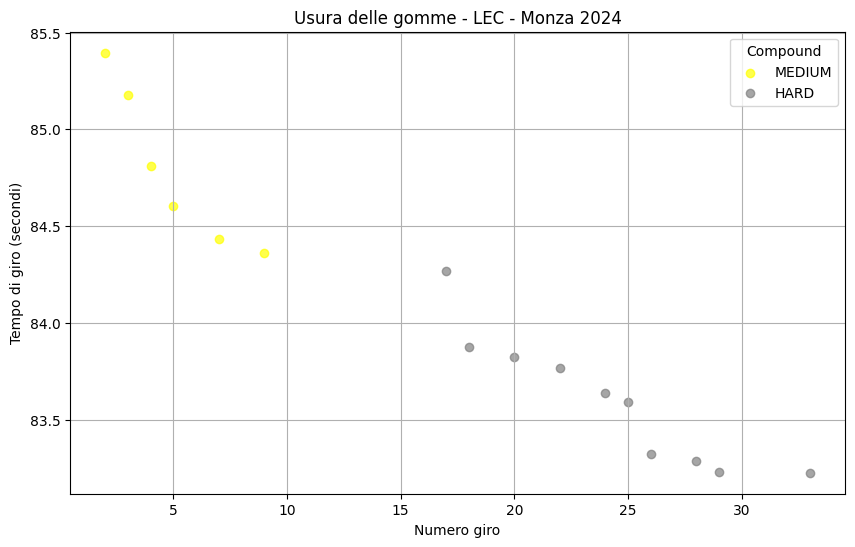

In [28]:


GRAN_PREMIO = 'Monza'  # Cambia qui il nome del Gran Premio
ANNO = 2024  # Cambia qui l'anno della stagione

# Carica i dati della gara
session = ff1.get_session(ANNO, GRAN_PREMIO, 'R')  # 'R' per la gara
session.load()

# Ottieni i tempi di giro
laps = session.laps

# Filtra i dati per un pilota specifico (es. 'HAM' per Hamilton)
driver = 'LEC'  # Cambia qui il pilota
driver_laps = laps.pick_driver(driver)

# Seleziona solo i giri validi (escludendo pit stop, giri di formazione, ecc.)
driver_laps = driver_laps[driver_laps['IsPersonalBest']]

# Crea un grafico per visualizzare l'usura delle gomme
plt.figure(figsize=(10, 6))

# Colori per i compound degli pneumatici
compound_colors = {
    'SOFT': 'red',
    'MEDIUM': 'yellow',
    'HARD': 'grey',
    'INTERMEDIATE': 'green',
    'WET': 'blue'
}

# Plot dei tempi di giro in base al compound
for compound, color in compound_colors.items():
    compound_laps = driver_laps[driver_laps['Compound'] == compound]
    if not compound_laps.empty:
        plt.scatter(compound_laps['LapNumber'], compound_laps['LapTime'].dt.total_seconds(),
                    color=color, label=f'{compound}', alpha=0.7)

# Aggiungi dettagli al grafico
plt.title(f'Usura delle gomme - {driver} - {GRAN_PREMIO} {ANNO}')
plt.xlabel('Numero giro')
plt.ylabel('Tempo di giro (secondi)')
plt.legend(title='Compound')
plt.grid(True)
plt.show()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 

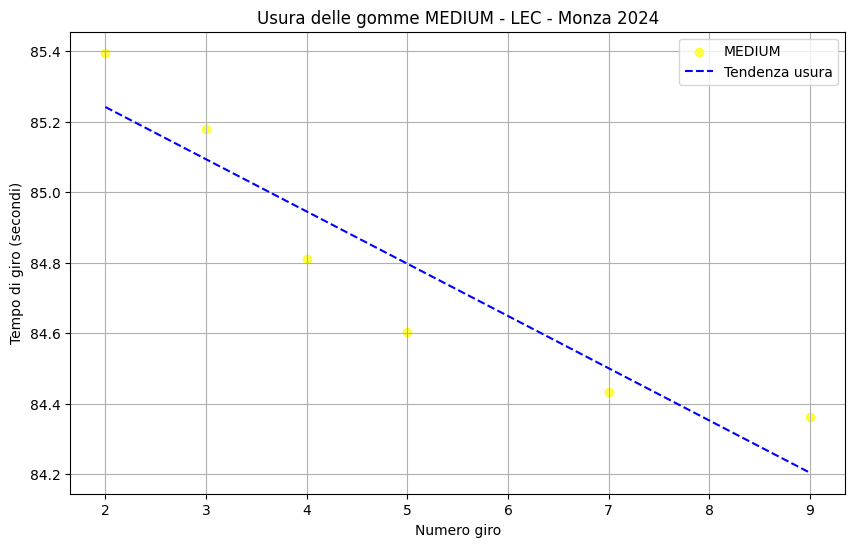

In [39]:

GRAN_PREMIO = 'Monza'  # Cambia qui il nome del Gran Premio
ANNO = 2024  # Cambia qui l'anno della stagione
DRIVER = 'LEC'  # Cambia qui il pilota
COMPOUND = 'MEDIUM'  # Cambia qui il compound da analizzare (es. 'SOFT', 'MEDIUM', 'HARD')

# Carica i dati della gara
session = ff1.get_session(ANNO, GRAN_PREMIO, 'R')  # 'R' per la gara
session.load()

# Ottieni i tempi di giro
laps = session.laps

# Filtra i dati per il pilota specificato
driver_laps = laps.pick_driver(DRIVER)

# Filtra i giri in cui è stato utilizzato il compound selezionato
compound_laps = driver_laps[driver_laps['Compound'] == COMPOUND]

# Seleziona solo i giri validi (escludendo pit stop, giri di formazione, ecc.)
compound_laps = compound_laps[compound_laps['IsPersonalBest']]

# Se non ci sono giri con il compound selezionato, interrompi l'esecuzione
if compound_laps.empty:
    print(f"Nessun dato trovato per il compound {COMPOUND} del pilota {DRIVER}.")
else:
    # Crea un grafico per visualizzare l'usura delle gomme
    plt.figure(figsize=(10, 6))

    # Plot dei tempi di giro per il compound selezionato
    plt.scatter(compound_laps['LapNumber'], compound_laps['LapTime'].dt.total_seconds(),
                color='yellow', label=f'{COMPOUND}', alpha=0.7)

    # Aggiungi una linea di tendenza per visualizzare l'usura
    z = np.polyfit(compound_laps['LapNumber'], compound_laps['LapTime'].dt.total_seconds(), 1)
    p = np.poly1d(z)
    plt.plot(compound_laps['LapNumber'], p(compound_laps['LapNumber']), 'b--', label='Tendenza usura')

    # Aggiungi dettagli al grafico
    plt.title(f'Usura delle gomme {COMPOUND} - {DRIVER} - {GRAN_PREMIO} {ANNO}')
    plt.xlabel('Numero giro')
    plt.ylabel('Tempo di giro (secondi)')
    plt.legend()
    plt.grid(True)
    plt.show()